In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Interpolación lineal

<img src="interlineal.png" alt="drawing" width="500"/>

$f(x)\approx y=\frac{y_{i+1}-y_i}{x_{i+1}-x_{i}}(x-x_i)+y_i$


#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Encontrar el intervalo tal que $x \in [x_i,x_{i+1}]$


2. $y \approx f(x)$


3. Analizar error si se puede. $\epsilon=|y-f(x)|$

In [2]:
def interpolacion_lineal(x_int,xn,yn):
  N=len(xn)

  for i in range(N-1):
    if x_int>=xn[i] and x_int<=xn[i+1]:
      y_int=(yn[i+1]-yn[i])/(xn[i+1]-xn[i])*(x_int-xn[i])+yn[i]
      break

  return y_int

La solución encontrada para f( 2 ) es: 0.8399399804707917
La solución real para f( 2 ) es: 0.9092974268256817
La solución tiene un error de 16.006001952920833 %


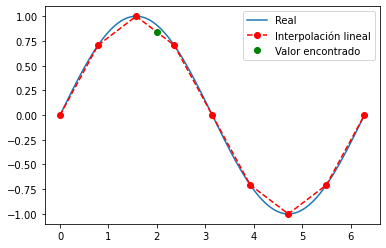

In [3]:
def f(x):
    return np.sin(x)

xn=np.linspace(0,2*np.pi,9)
yn=f(xn)
#print(xn,yn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)

x_sol=2
y_sol=interpolacion_lineal(x_sol,xn,yn)


print('La solución encontrada para f(',x_sol,') es:',y_sol)
print('La solución real para f(',x_sol,') es:',f(x_sol))

error=abs(y_sol-f(x_sol)/f(x_sol))

print('La solución tiene un error de',error*100,'%')

plt.plot(xreal,f(xreal),label='Real')
plt.plot(xn,yn,'o--',color='red',label='Interpolación lineal')
plt.plot(x_sol,y_sol,'o',color='green',label='Valor encontrado')
plt.legend()

x##### Comparación con el valor real y n puntos interpolados

$\langle \epsilon \rangle = \frac{1}{n}\sum_i \epsilon_i $

$\epsilon_i = |y-f(x_i)|$

Error promedio 0.01071104258180683


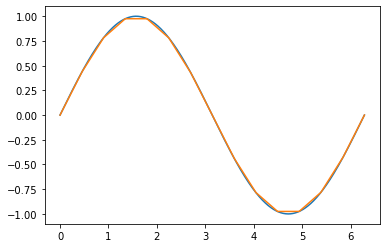

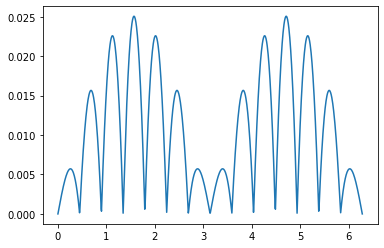

In [4]:
puntos=15
xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)

ylin=np.zeros(len(xreal))

for i in range(len(xreal)):
  ylin[i]=interpolacion_lineal(xreal[i],xn,yn)

error=abs((ylin-yreal))
errorprom=sum(error)/len(error)

plt.figure()
plt.plot(xreal,yreal)
plt.plot(xreal,ylin)

plt.figure()
plt.plot(xreal,error)

print('Error promedio',errorprom)

# Interpolación a polinomios de grado n

$f(x) \approx P_n(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{1}x+a_{0}$

# Método de Lagrange

#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Determinar grado del polinomio $n=$ elementos del conjunto $-1$


2. $f(x) \approx P_n(x) = \sum_{i}^{n} f(x_i) L_{n,i}(x) = \sum_{i}^{n} y_i L_{n,i}(x)$


3. $L_{n,i}(x)=\Pi_{m}^{n} \frac{x-x_m}{x_i-x_m}$ con $m\neq i$


$L_{n,i}(x_j) = \begin{cases}
1 & j=i \\
0 & j\neq i
\end{cases}$

4. Analizar error $\epsilon=|y-f(x)|$

In [5]:
def interpolacion_Lagrange(x_int,xn,yn):
  n=len(xn)-1

  def L(x,n,i):
    prod=1
    for m in range(n):
      if m!=i:
        prod*=(x-xn[m])/(xn[i]-xn[m])
    return prod

  suma=0
  for i in range(n):
    suma+=yn[i]*L(x_int,n,i)

  return suma

Lineal: Error promedio es  0.13648312897272946
Lagrange: Error promedio es  0.08324940376874267


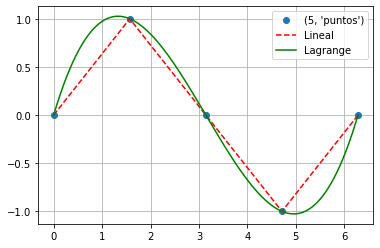

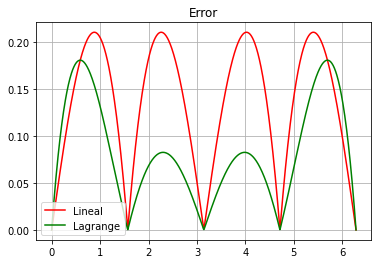

In [6]:
puntos=5
xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)

ylin=np.zeros(len(xreal))
ylag=np.zeros(len(xreal))

for i in range(len(xreal)):
  ylin[i]=interpolacion_lineal(xreal[i],xn,yn)
  ylag[i]=interpolacion_Lagrange(xreal[i],xn,yn)

errlin=abs((ylin-yreal))
errpromlin=sum(errlin)/len(errlin)
errlag=abs((ylag-yreal))
errpromlag=sum(errlag)/len(errlag)


plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,ylag,color='green',label='Lagrange')
#plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()


plt.figure()
plt.title('Error')
plt.plot(xreal,errlin,color='red',label='Lineal')
plt.plot(xreal,errlag,color='green',label='Lagrange')
plt.legend()
plt.grid()

print ('Lineal: Error promedio es ', errpromlin)
print ('Lagrange: Error promedio es ', errpromlag)

## Para la tarea
Graficar $\langle\epsilon \rangle$ vs $n$ donde $\langle\epsilon \rangle$ es el error absoluto promedio y $n$ el número de puntos

# Método de Diferencias divididas

$f(x) \approx P_n(x) = a_{0} + a_{1} (x-x_{0}) + a_{2} (x-x_{0})(x-x_{1}) +... a_{n} (x-x_{0})(x-x_{1})...(x-x_{n-1})$

### Grado 0
$f(x_0)= y_0 =a_0=D_0[x_0]$ 

$D_0[x_i]=f[x_i]=y_i$

### Grado 1
$f(x_1)=y_1 =a_0+a_1(x_1-x_0) \rightarrow a_1=\frac{y_1-y_0}{x_1-x_0}=D_1[x_0]$

$D_1[x_i]=f[x_i,x_{i+1}]=\frac{D_0[x_{i+1}]-D_0[x_i]}{x_{i+1}-x_i}$ 

### Grado 2
$f(x_2)=y_2=a_{0} + a_{1} (x_2-x_{0}) + a_{2} (x_2-x_{0})(x_2-x_{1}) \rightarrow 
a_2= D_2[x_0] = \frac{D_1[x_1]-D_1[x_0]}{x_2-x_0}$

$D_2[x_i]=f[x_i,x_{i+1},x_{i+2}]=\frac{D_1[x_{i+1}]-D_1[x_i]}{x_{i+2}-x_i}$

...

### Grado k
$f(x_k)=y_k \rightarrow a_k=D_k[x_0]$

$D_k[x_i]=f[x_i,x_{i+1},x_{i+2},...,x_{i+k}]=\frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_i]}{x_{i+k}-x_i}$

#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Determinar grado del polinomio $n=$ elementos del conjunto $-1$


2. $f(x)\approx P_n(x) = D_0[x_0] + \sum_{k=1}^{n} D_k[x_0] (x-x_0)(x-x_1)...(x-x_{k-1})$


3. $D_k[x_i]=f[x_i,x_{i+1},x_{i+2},...,x_{i+k}]=\frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_i]}{x_{i+k}-x_i}$


4. Analizar error $\epsilon=|y-f(x)|$

In [7]:
def interpolacion_diferencias(x_int,xn,yn):
  N=len(xn)

  D=np.zeros((N,N))

  D[0,:]=yn

  for k in range(1,N):
    for i in range(N-k):

      D[k,i]=(D[k-1,i+1]-D[k-1,i])/(xn[i+k]-xn[i])

  suma=D[0,0]

  for k in range(1,N):
    prod=1
    for p in range(k-1 +1):
      prod*=(x_int-xn[p]) 

    suma+=D[k,0]*prod

  return suma

  



Lineal: Error promedio es  0.13648312897272946
Lagrange: Error promedio es  0.08324940376874267
Diferencias divididas: Error promedio es  0.08324940376874249


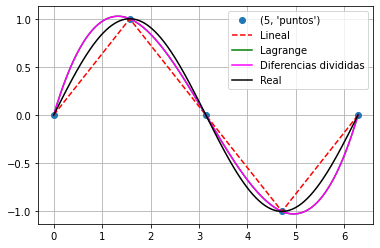

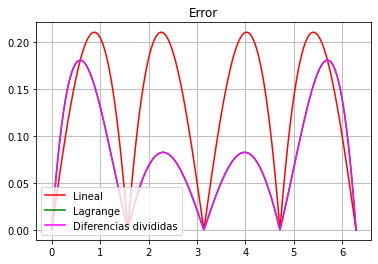

In [8]:
puntos=5
xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)

ylin=np.zeros(len(xreal))
ylag=np.zeros(len(xreal))
ydif=np.zeros(len(xreal))

for i in range(len(xreal)):
  ylin[i]=interpolacion_lineal(xreal[i],xn,yn)
  ylag[i]=interpolacion_Lagrange(xreal[i],xn,yn)
  ydif[i]=interpolacion_diferencias(xreal[i],xn,yn)

plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,ylag,color='green',label='Lagrange')
plt.plot(xreal,ydif,color='magenta',label='Diferencias divididas')
plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()

errlin=abs((yreal-ylin))
errlag=abs((yreal-ylag))
errdif=abs((yreal-ydif))

plt.figure()
plt.title('Error')
plt.plot(xreal,errlin,color='red',label='Lineal')
plt.plot(xreal,errlag,color='green',label='Lagrange')
plt.plot(xreal,errdif,color='magenta',label='Diferencias divididas')
plt.legend()
plt.grid()

errpromlin=sum(errlin)/len(errlin)
errpromlag=sum(errlag)/len(errlag)
errpromdif=sum(errdif)/len(errdif)

print ('Lineal: Error promedio es ', errpromlin)
print ('Lagrange: Error promedio es ', errpromlag)
print ('Diferencias divididas: Error promedio es ', errpromdif)

# Reto

Demostrar que para cualquier conjunto $\lbrace (x_i,f(x_i))\rbrace$ de $n+1$ elementos, el polinomío de grado $n$

$P_n(x) = \sum_{i=0}^{n} f(x_i) L_{n,i}(x)  = D_0[x_0] + \sum_{k=1}^{n} D_k[x_0] (x-x_0)(x-x_1)...(x-x_{k-1})$

con 

$L_{n,k}(x)=\Pi_{m=0}^{n} \frac{x-x_m}{x_k-x_m}$ con $m\neq k$

En otras palabras, demuestre que el método de interpolacion de Lagrange y el método de interpolación de Diferencias divididas son equivalentes.


### Ejemplo $n=1$

$P_1(x)=\sum_{i=0}^{1} f(x_i) L_{1,i}(x)= f(x_0)L_{1,0}(x)+f(x_1)L_{1,1}(x)$

$=f(x_0)\frac{x-x_1}{x_0-x_1}+f(x_1)\frac{x-x_0}{x_1-x_0}$

$=\frac{1}{x_1-x_0}[f(x_1)(x-x_0)-f(x_0)(x-x_1)]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+x(f(x_1)-f(x_0))]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+x(f(x_1)-f(x_0))-x_0(f(x_1)-f(x_0))+x_0(f(x_1)-f(x_0))]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+(x-x_0)(f(x_1)-f(x_0))+x_0f(x_1)-x_0f(x_0)]$

$=\frac{1}{x_1-x_0}[f(x_0)(x_1-x_0)+(x-x_0)(f(x_1)-f(x_0))]$

$=D_0[x_0]+D_1[x_0](x-x_0)$

# Método de Hermite

#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i,f'(x_i)) \rbrace$


1. Cambiar $\lbrace (x_i,y_i) \rbrace$ a $\lbrace (z_i,w_i) \rbrace$ con $\begin{cases} z_{2i}=z_{2i+1}=x_i \\
w_{2i}=w_{2i+1}=y_i
\end{cases}$


2. Interpolar $\lbrace (z_i,w_i) \rbrace$ con diferencias divididas con $\begin{cases} D_1[z_{2i}]=f'(x_i) \\
D_1[z_{2i+1}]=\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}
\end{cases}$


3. $D_k[z_i]=f[z_i,z_{i+1},z_{i+2},...,z_{i+k}]=\frac{D_{k-1}[z_{i+1}]-D_{k-1}[z_i]}{z_{i+k}-z_i}$


4. $f(x)\approx H_{2n+1}(x)=D_0[z_0]+\sum_{k=1}^{2n+1} D_k[z_0](x-x_0)(x-x_1)...(x-x_{k-1})$


5. Analizar error $\epsilon=|y-f(x)|$


In [11]:
def df(x):
    return np.cos(x)

dyn=df(xn)

def interpolacion_Hermite(x_int,xn,yn,dyn):
    
    n=len(xn)
    
    zn=np.zeros(2*n)
    wn=np.zeros(2*n)
    dwn=np.zeros(2*n)
    
    for i in range(0,n):
        zn[2*i]=xn[i]
        zn[2*i+1]=xn[i]
        wn[2*i]=yn[i]
        wn[2*i+1]=yn[i]
        dwn[2*i]=dyn[i]
        dwn[2*i+1]=dyn[i]
        
    n=len(zn)-1
    
    D=np.zeros((n+1,n+1))
    
    D[0,:]=wn
    
    for i in range(0,n+1-1):
        if i%2==0:
            D[1,i]=dwn[i]
        else:
            D[1,i]=(wn[i+1]-wn[i])/(zn[i+1]-zn[i])
            
    for k in range(2,n+1):
        for i in range(0,n+1-k):
            D[k,i]=(D[k-1,i+1]-D[k-1,i])/(zn[i+k]-zn[i])
    
    suma=D[0,0]
    
    for k in range(1,n+1):
        prod=1.
        
        for p in range(0,k):
            prod*=(x_int-zn[p])
        
        suma+=D[k,0]*prod
   
    return suma

100%|██████████| 1000/1000 [00:00<00:00, 6993.65it/s]


Lineal: Error promedio es  0.13648312897272946
Lagrange: Error promedio es  0.08324940376874267
Diferencias divididas: Error promedio es  0.08324940376874249
Hermite: Error promedio es 1.571233952500371e-05


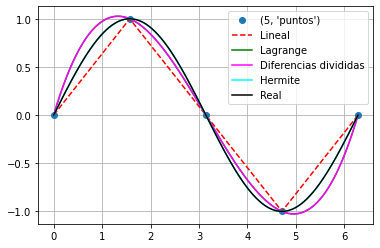

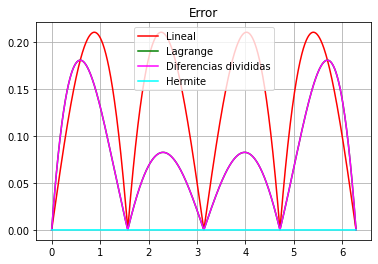

In [13]:
puntos=5

xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)
dyn=df(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)
ylin=np.zeros(len(xreal))
ylag=np.zeros(len(xreal))
ydif=np.zeros(len(xreal))
yher=np.zeros(len(xreal))

for k in tqdm(range(len(xreal))):
    ylin[k] = interpolacion_lineal(xreal[k],xn,yn)
    ylag[k] = interpolacion_Lagrange(xreal[k],xn,yn)
    ydif[k] = interpolacion_diferencias(xreal[k],xn,yn)
    yher[k] = interpolacion_Hermite(xreal[k],xn,yn,dyn)

plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,ylag,color='green',label='Lagrange')
plt.plot(xreal,ydif,color='magenta',label='Diferencias divididas')
plt.plot(xreal,yher,color='cyan',label='Hermite')
plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()

errlin=abs((yreal-ylin))
errlag=abs((yreal-ylag))
errdif=abs((yreal-ydif))
errher=abs((yreal-yher))

plt.figure()
plt.title('Error')
plt.plot(xreal,errlin,color='red',label='Lineal')
plt.plot(xreal,errlag,color='green',label='Lagrange')
plt.plot(xreal,errdif,color='magenta',label='Diferencias divididas')
plt.plot(xreal,errher,color='cyan',label='Hermite')
plt.legend()
plt.grid()

errpromlin=sum(errlin)/len(errlin)
errpromlag=sum(errlag)/len(errlag)
errpromdif=sum(errdif)/len(errdif)
errpromher=sum(errher)/len(errher)
print ('Lineal: Error promedio es ', errpromlin)
print ('Lagrange: Error promedio es ', errpromlag)
print ('Diferencias divididas: Error promedio es ', errpromdif)
print ('Hermite: Error promedio es', errpromher)